In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist # fetch dataset in keras

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()  #train,test,split

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape #sixe of training set and test test

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
#x_train[0]

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

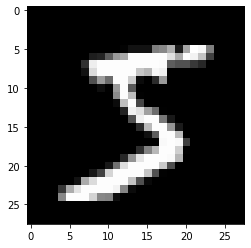

In [7]:
plt.imshow(x_train[0],cmap = matplotlib.cm.gray)

In [8]:
#plt.imshow(x_train[0],cmap = matplotlib.cm.gray)

In [9]:
#plt.imshow(x_train[0],cmap = matplotlib.cm.binary)
#y_train[0]

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train[0] #now all values will be btwn 0 and 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [25]:
model = Sequential()

In [26]:
model.add(Flatten(input_shape = (28,28)))

In [27]:
model.add(Dense(128,activation = 'sigmoid'))

In [28]:
model.add(Dense(10,activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [31]:
history = model.fit(x_train,y_train,batch_size = 64,epochs = 30,verbose=1,validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 2s 3ms/step - loss: 0.5295 - accuracy: 0.8714 - val_loss: 0.2809 - val_accuracy: 0.9243
Epoch 2/30
750/750 [==============================] - 2s 2ms/step - loss: 0.2553 - accuracy: 0.9287 - val_loss: 0.2148 - val_accuracy: 0.9401
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 0.1984 - accuracy: 0.9433 - val_loss: 0.1786 - val_accuracy: 0.9490
Epoch 4/30
750/750 [==============================] - 2s 2ms/step - loss: 0.1622 - accuracy: 0.9530 - val_loss: 0.1563 - val_accuracy: 0.9553
Epoch 5/30
750/750 [==============================] - 2s 2ms/step - loss: 0.1366 - accuracy: 0.9607 - val_loss: 0.1402 - val_accuracy: 0.9588
Epoch 6/30
750/750 [==============================] - 2s 2ms/step - loss: 0.1163 - accuracy: 0.9664 - val_loss: 0.1265 - val_accuracy: 0.9637
Epoch 7/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0998 - accuracy: 0.9719 - val_loss: 0.1191 - val_accuracy: 0.9653
Epoch 

In [32]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 956us/step - loss: 0.0803 - accuracy: 0.9787


[0.0803457573056221, 0.9786999821662903]

In [36]:
y_pred = model.predict(x_test) # gives the probality of each record to be the categories from 1 to 10
y_pred

313/313 [==============================] - 0s 869us/step


array([[1.6742259e-08, 2.4587206e-09, 1.8458229e-08, ..., 9.9998558e-01,
        1.8881362e-08, 1.0568041e-07],
       [2.7906188e-09, 4.9466798e-06, 9.9999237e-01, ..., 2.3551402e-14,
        7.2151448e-07, 2.4105060e-12],
       [1.1965050e-08, 9.9978441e-01, 1.5195175e-04, ..., 1.8889154e-05,
        3.8761464e-05, 1.6655493e-07],
       ...,
       [9.9774815e-12, 2.3024875e-11, 6.2666580e-11, ..., 3.4554947e-07,
        6.5926251e-08, 1.6500044e-06],
       [2.4787529e-13, 4.7018456e-10, 2.4890031e-11, ..., 2.8575031e-10,
        6.0134139e-06, 1.1763167e-10],
       [6.0773070e-10, 2.4543783e-09, 2.4948514e-07, ..., 9.5935430e-12,
        1.8986469e-11, 3.5520614e-11]], dtype=float32)

In [37]:
y_pred[0]

array([1.67422591e-08, 2.45872056e-09, 1.84582287e-08, 1.43080815e-05,
       2.12995056e-11, 3.25629884e-10, 1.88356855e-15, 9.99985576e-01,
       1.88813623e-08, 1.05680407e-07], dtype=float32)

In [39]:
import numpy as np
np.argmax(y_pred[0])

7

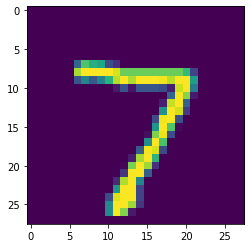

In [40]:
plt.imshow(x_test[0])

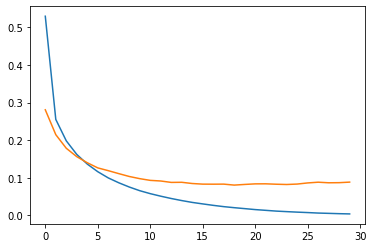

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

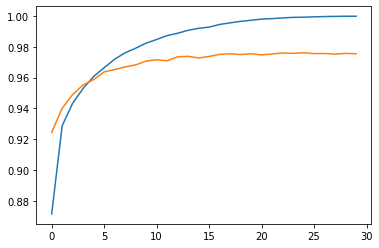

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])